In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 1. EDA

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values in each column
- Check statistics of the data set
- Check the correlation column then heatmap

In [61]:
house_df = pd.read_csv("/content/data.csv")
df = house_df.copy()

In [62]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [63]:
df.sample(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1627,2014-05-30 00:00:00,399000.0,2.0,1.00,940,4800,1.0,0,0,4,940,0,1911,1955,3209 63rd Ave SW,Seattle,WA 98116,USA
251,2014-05-07 00:00:00,314500.0,3.0,1.75,1870,12381,1.0,0,0,4,1870,0,1957,2001,29645 10th Pl S,Federal Way,WA 98003,USA


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [65]:
numeric_features = [feature for feature in house_df.columns if house_df[feature].dtype != 'O']
categorical_features = [feature for feature in house_df.columns if house_df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

We have 5 categorical features : ['date', 'street', 'city', 'statezip', 'country']


## I) **Check for null items**

In [66]:
house_df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [67]:
house_df.duplicated().sum() # in rows

0

In [68]:
df.nunique() # total unique values in each features

,0
date,70
price,1741
bedrooms,10
bathrooms,26
sqft_living,566
sqft_lot,3113
floors,6
waterfront,2
view,5
condition,5


In [73]:
df[["bedrooms","bathrooms","floors"]]=df[["bedrooms","bathrooms","floors"]].astype(int)
df["date"]=pd.to_datetime(df["date"]).dt.date
df[["city","statezip","country"]]=df[["city","statezip","country"]].astype("category") #streets has too many unique values cant convert to category

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           4600 non-null   object  
 1   price          4600 non-null   float64 
 2   bedrooms       4600 non-null   int64   
 3   bathrooms      4600 non-null   int64   
 4   sqft_living    4600 non-null   int64   
 5   sqft_lot       4600 non-null   int64   
 6   floors         4600 non-null   int64   
 7   waterfront     4600 non-null   int64   
 8   view           4600 non-null   int64   
 9   condition      4600 non-null   int64   
 10  sqft_above     4600 non-null   int64   
 11  sqft_basement  4600 non-null   int64   
 12  yr_built       4600 non-null   int64   
 13  yr_renovated   4600 non-null   int64   
 14  street         4600 non-null   object  
 15  city           4600 non-null   category
 16  statezip       4600 non-null   category
 17  country        4600 non-null   ca

In [76]:
numeric_features = [feature for feature in house_df.columns if house_df[feature].dtype not in ['O', 'category']]
categorical_features = [feature for feature in house_df.columns if house_df[feature].dtype in ['O', 'category']]

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

We have 5 categorical features : ['date', 'street', 'city', 'statezip', 'country']


In [79]:
memory_usage_total =df.memory_usage(deep=True).sum()
memory_usage_total2 = house_df.memory_usage(deep=True).sum()
print(f"\nTotal memory usage of original DataFrame: {memory_usage_total2 / (1024**2):.2f} MB")
print(f"\nTotal memory usage of Transformed DataFrame: {memory_usage_total / (1024**2):.2f} MB")


Total memory usage of original DataFrame: 1.95 MB

Total memory usage of Transformed DataFrame: 0.98 MB


In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,1.788913,0.752185,0.0,1.00,2.000000,2.00,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.459130,0.552194,1.0,1.00,1.000000,2.00,3.0
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


- !!! min price , bedroom ,bathroom is zero   

In [106]:
print("",(house_df.price==0).sum())
print("",(df.bedrooms==0).sum())
(df.bathrooms==0).sum()

 49
 2


19

In [111]:
# df.loc[df["price"] > 0, :].sample()

df.drop(df[(df[["price", "bedrooms", "bathrooms"]] == 0).any(axis=1)].index, inplace=True)
# drop rows with zero values that are irrelevant

In [112]:
(df["price"]==0).sum()

0

In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4532.0,558614.706085,564648.980755,7800.0,327375.0,465000.0,658691.00,26590000.0
bedrooms,4532.0,3.402471,0.896287,1.0,3.0,3.0,4.00,9.0
bathrooms,4532.0,1.790380,0.736964,1.0,1.0,2.0,2.00,8.0
sqft_living,4532.0,2136.515887,953.354911,520.0,1470.0,1970.0,2610.00,13540.0
sqft_lot,4532.0,14823.323698,36022.760102,638.0,5000.0,7680.0,10922.25,1074218.0
floors,4532.0,1.460282,0.552247,1.0,1.0,1.0,2.00,3.0
waterfront,4532.0,0.006399,0.079746,0.0,0.0,0.0,0.00,1.0
view,4532.0,0.233892,0.763906,0.0,0.0,0.0,0.00,4.0
condition,4532.0,3.449029,0.674475,1.0,3.0,3.0,4.00,5.0
sqft_above,4532.0,1825.248235,852.195176,520.0,1190.0,1590.0,2300.00,9410.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4532 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           4532 non-null   object  
 1   price          4532 non-null   float64 
 2   bedrooms       4532 non-null   int64   
 3   bathrooms      4532 non-null   int64   
 4   sqft_living    4532 non-null   int64   
 5   sqft_lot       4532 non-null   int64   
 6   floors         4532 non-null   int64   
 7   waterfront     4532 non-null   int64   
 8   view           4532 non-null   int64   
 9   condition      4532 non-null   int64   
 10  sqft_above     4532 non-null   int64   
 11  sqft_basement  4532 non-null   int64   
 12  yr_built       4532 non-null   int64   
 13  yr_renovated   4532 non-null   int64   
 14  street         4532 non-null   object  
 15  city           4532 non-null   category
 16  statezip       4532 non-null   category
 17  country        4532 non-null   categor

In [117]:
df.nunique()

,0
date,70
price,1734
bedrooms,9
bathrooms,7
sqft_living,552
sqft_lot,3075
floors,3
waterfront,2
view,5
condition,5


#### Heatmap

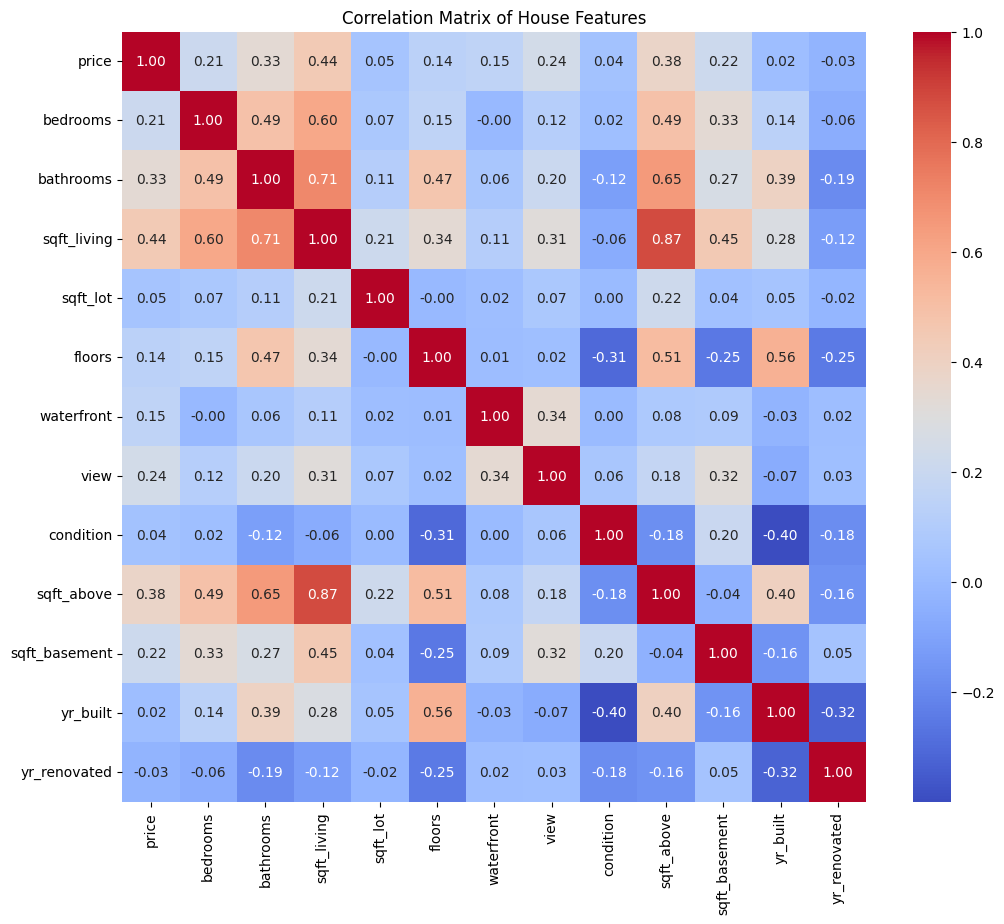

In [118]:
# Selects only columns with numeric data types

start_1=time.time()
numeric_df = df.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of House Features')
plt.show()
time_1=(time.time())-start_1

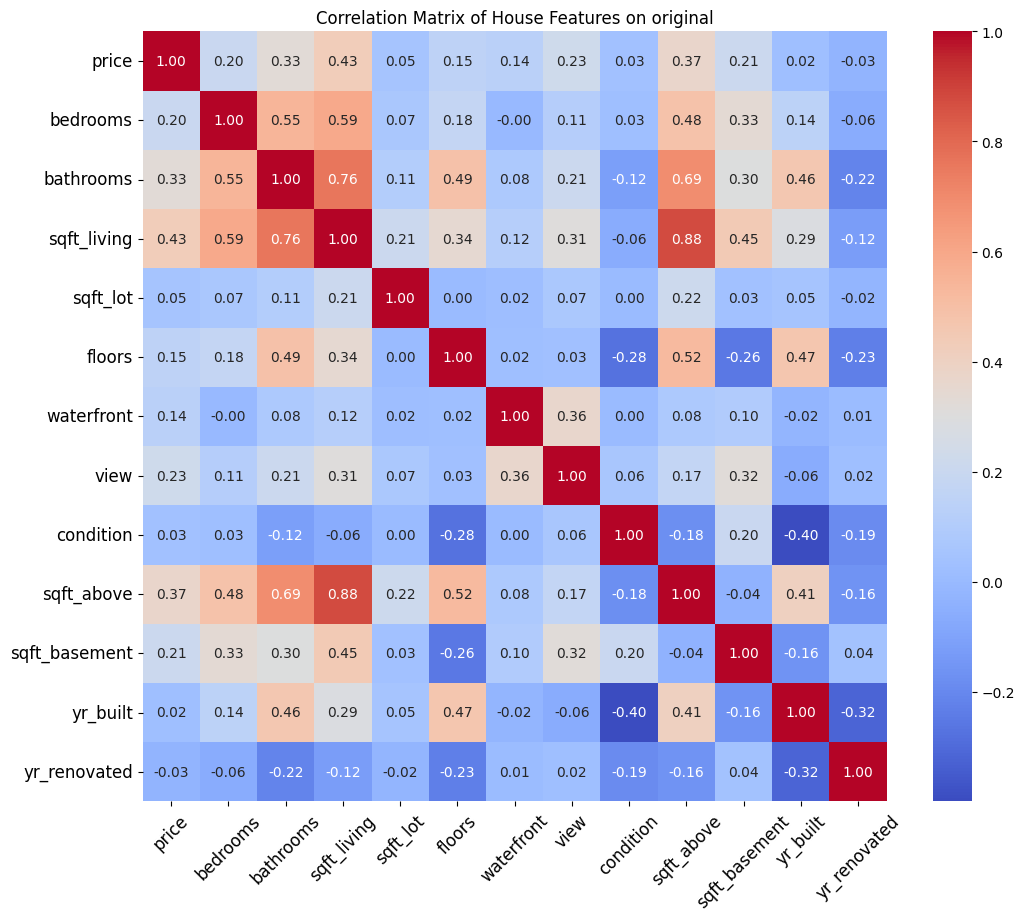

In [119]:
start_2=time.time()
numeric_df_2 = house_df.select_dtypes(include=np.number)

correlation_matrix_2 = numeric_df_2.corr()
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of House Features on original')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

time_2=(time.time()-start_2)

In [121]:
print("",time_1," ",time_2) # diff in creating original and transformed df

 0.5560956001281738   0.7174925804138184


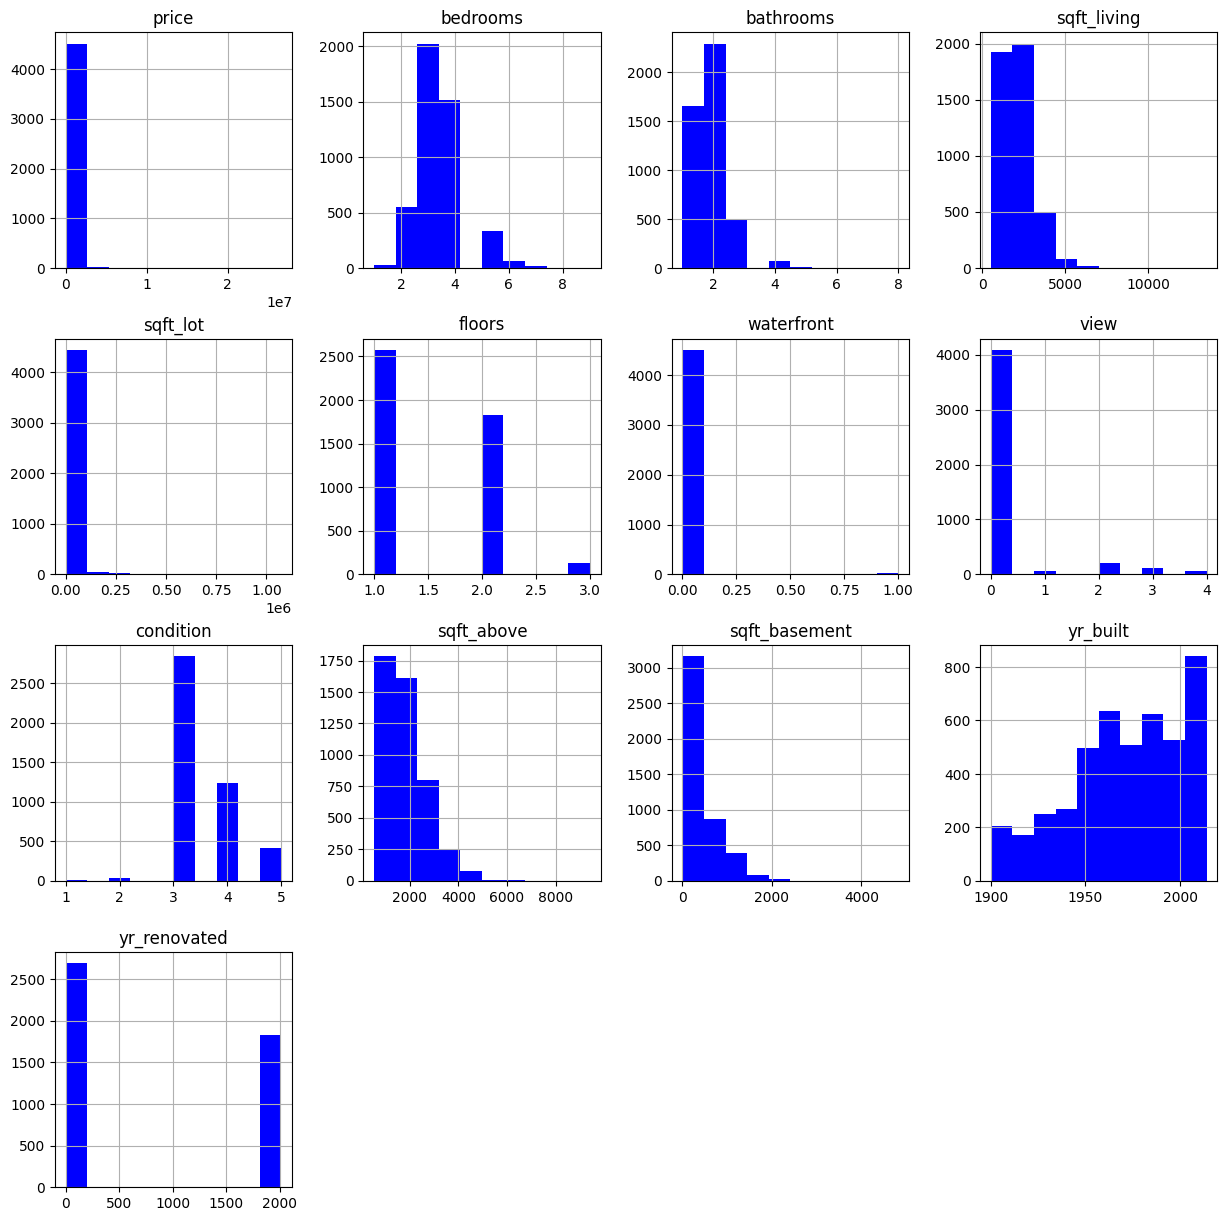

In [125]:
df.hist(figsize=(15, 15), xlabelsize=10, ylabelsize=10,color='blue');
# feature and the frequency

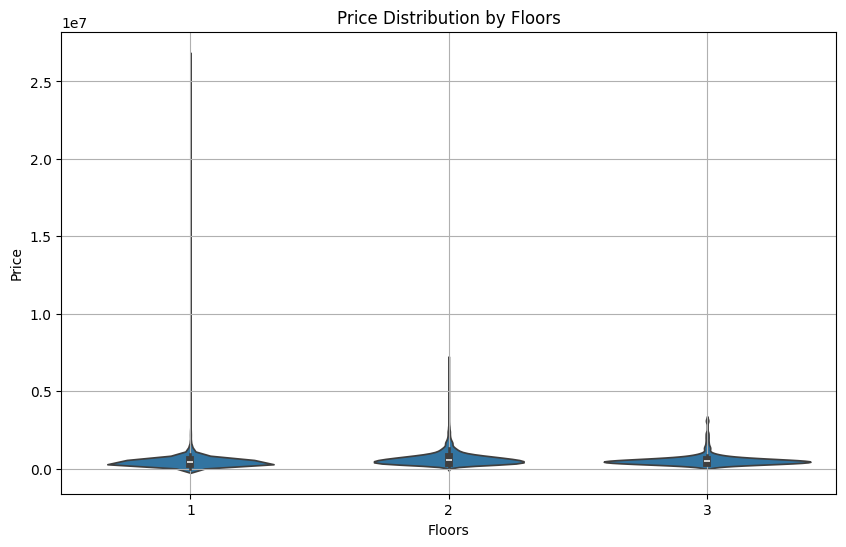

In [126]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='floors', y='price', data=df)
plt.title('Price Distribution by Floors')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.grid(True)
plt.show()

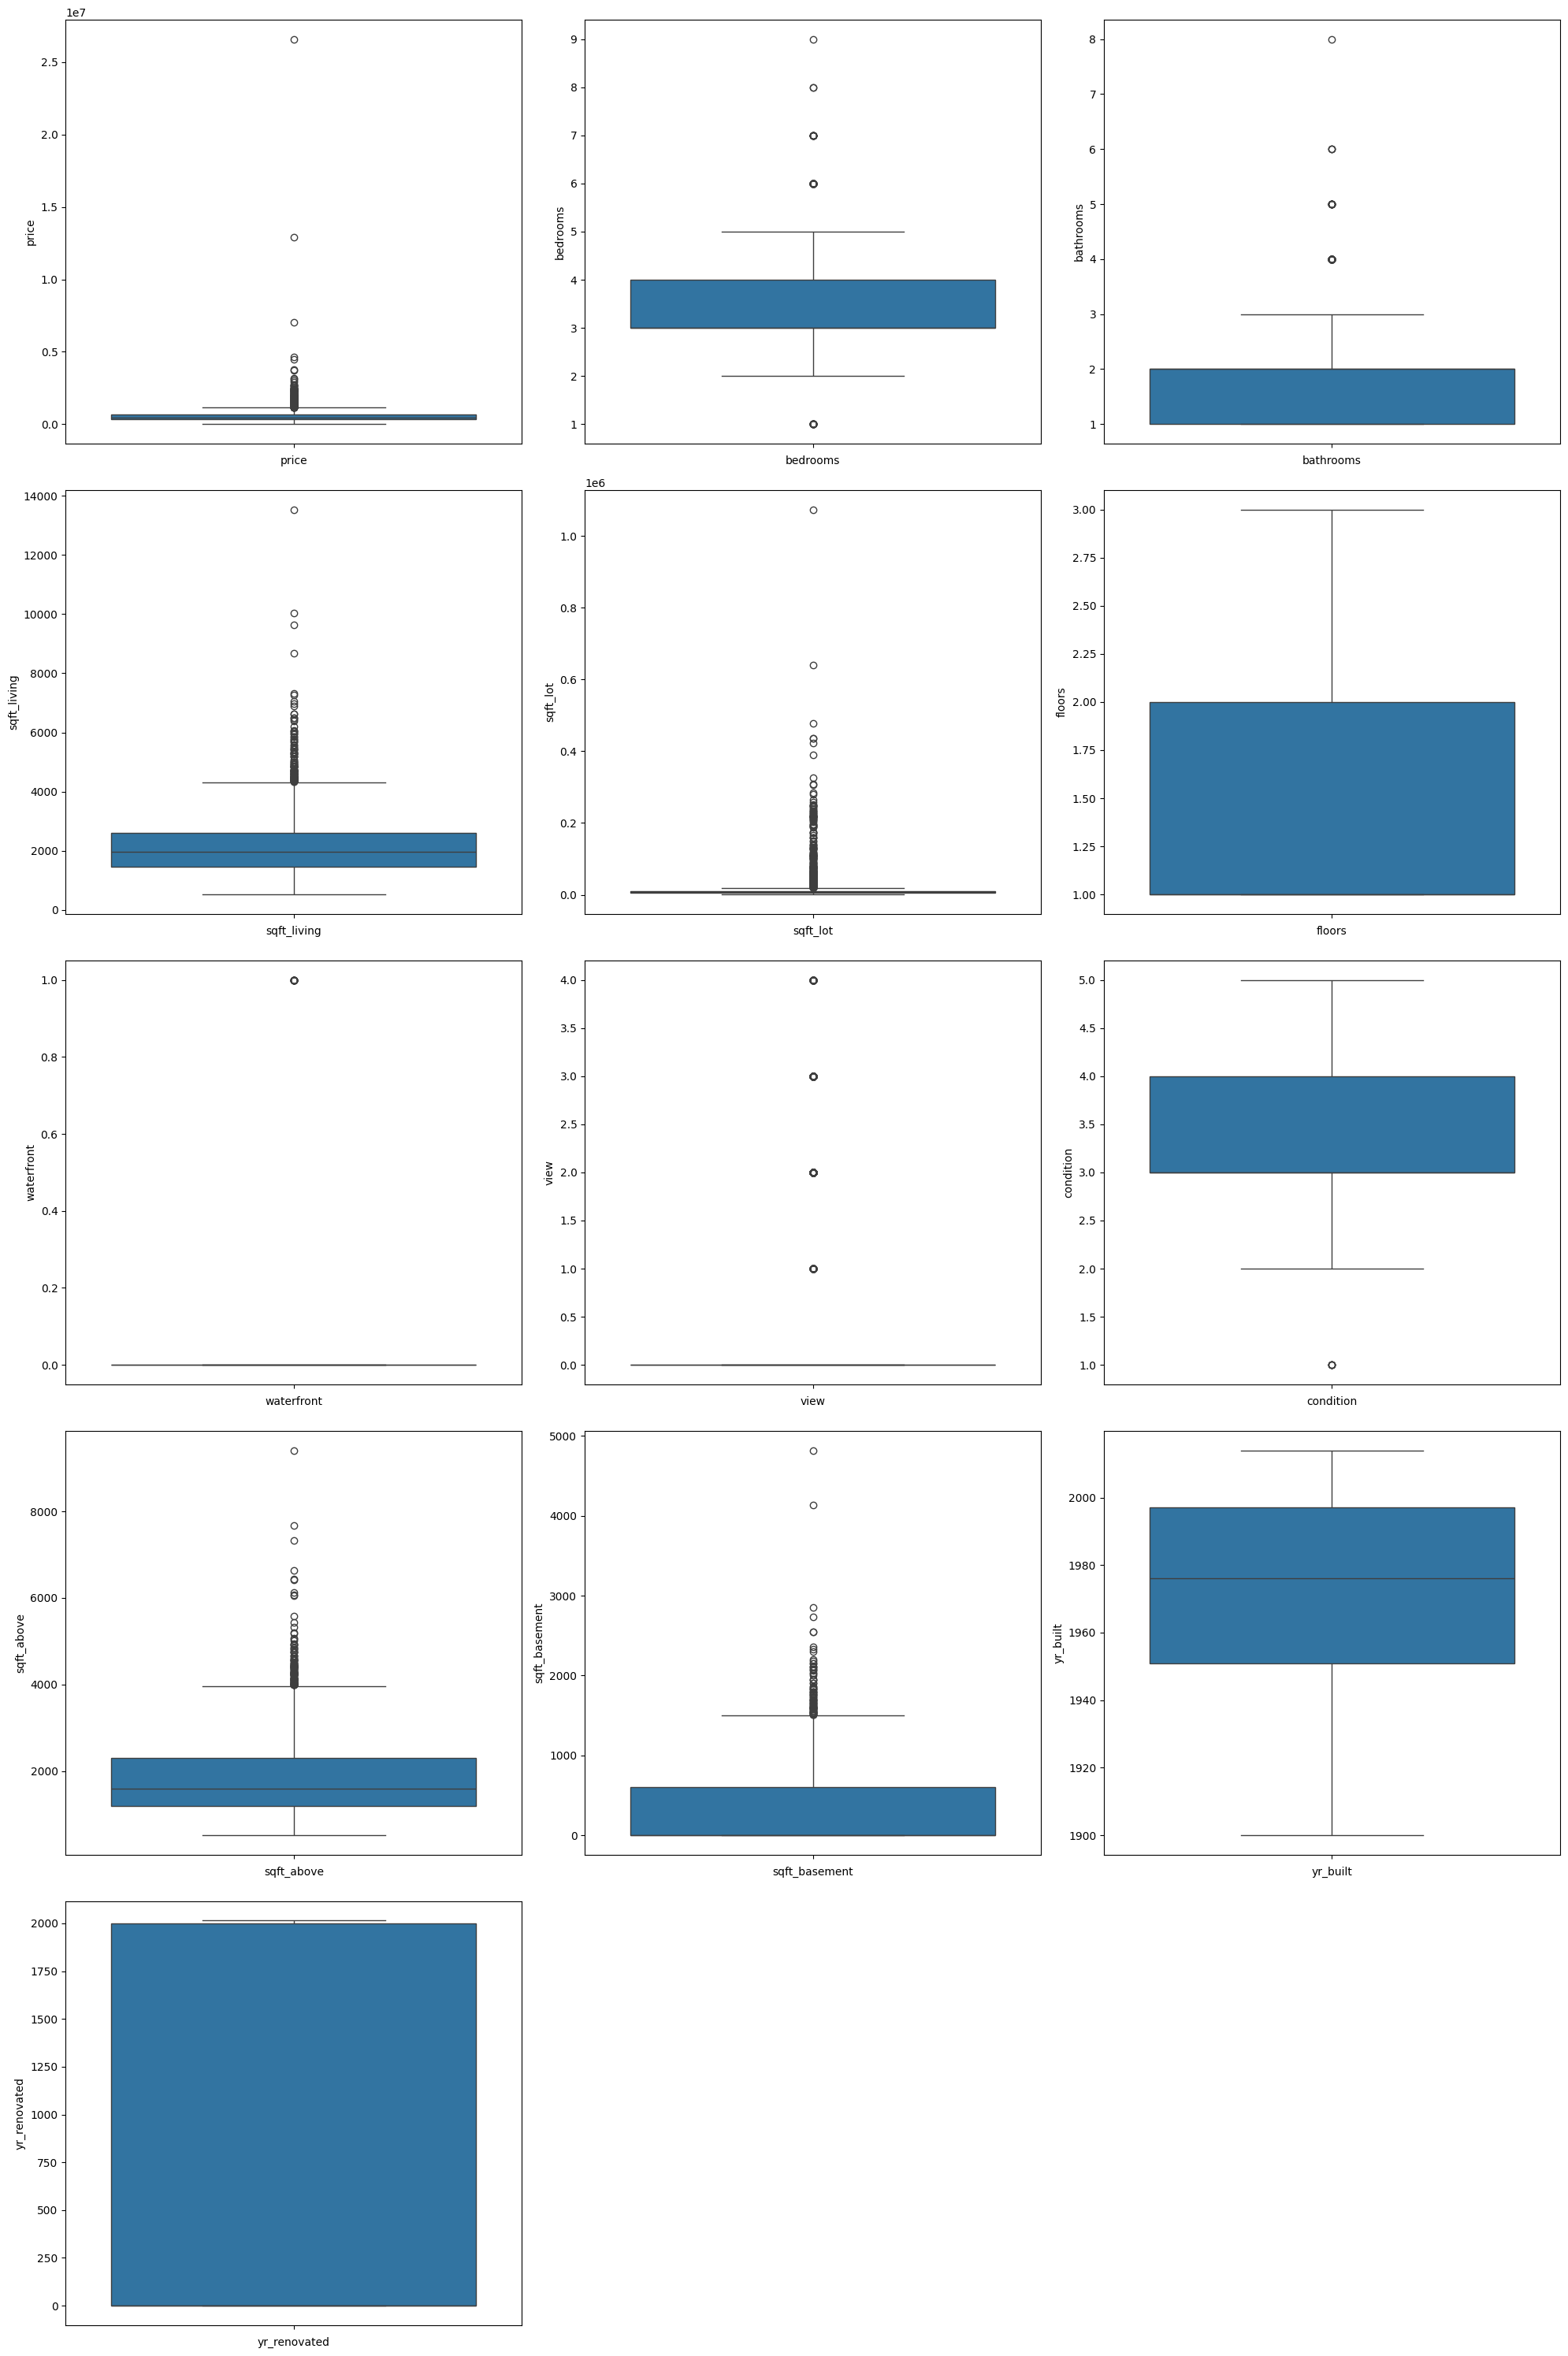

In [128]:
import math
numerical_data = df.select_dtypes(include=['float64', 'int64'])
num_columns = len(numerical_data.columns)

cols = 3
rows = math.ceil(num_columns / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,30))

axes = axes.flatten()

for i, column in enumerate(numerical_data.columns):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_xlabel(column)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.tight_layout()
plt.show()

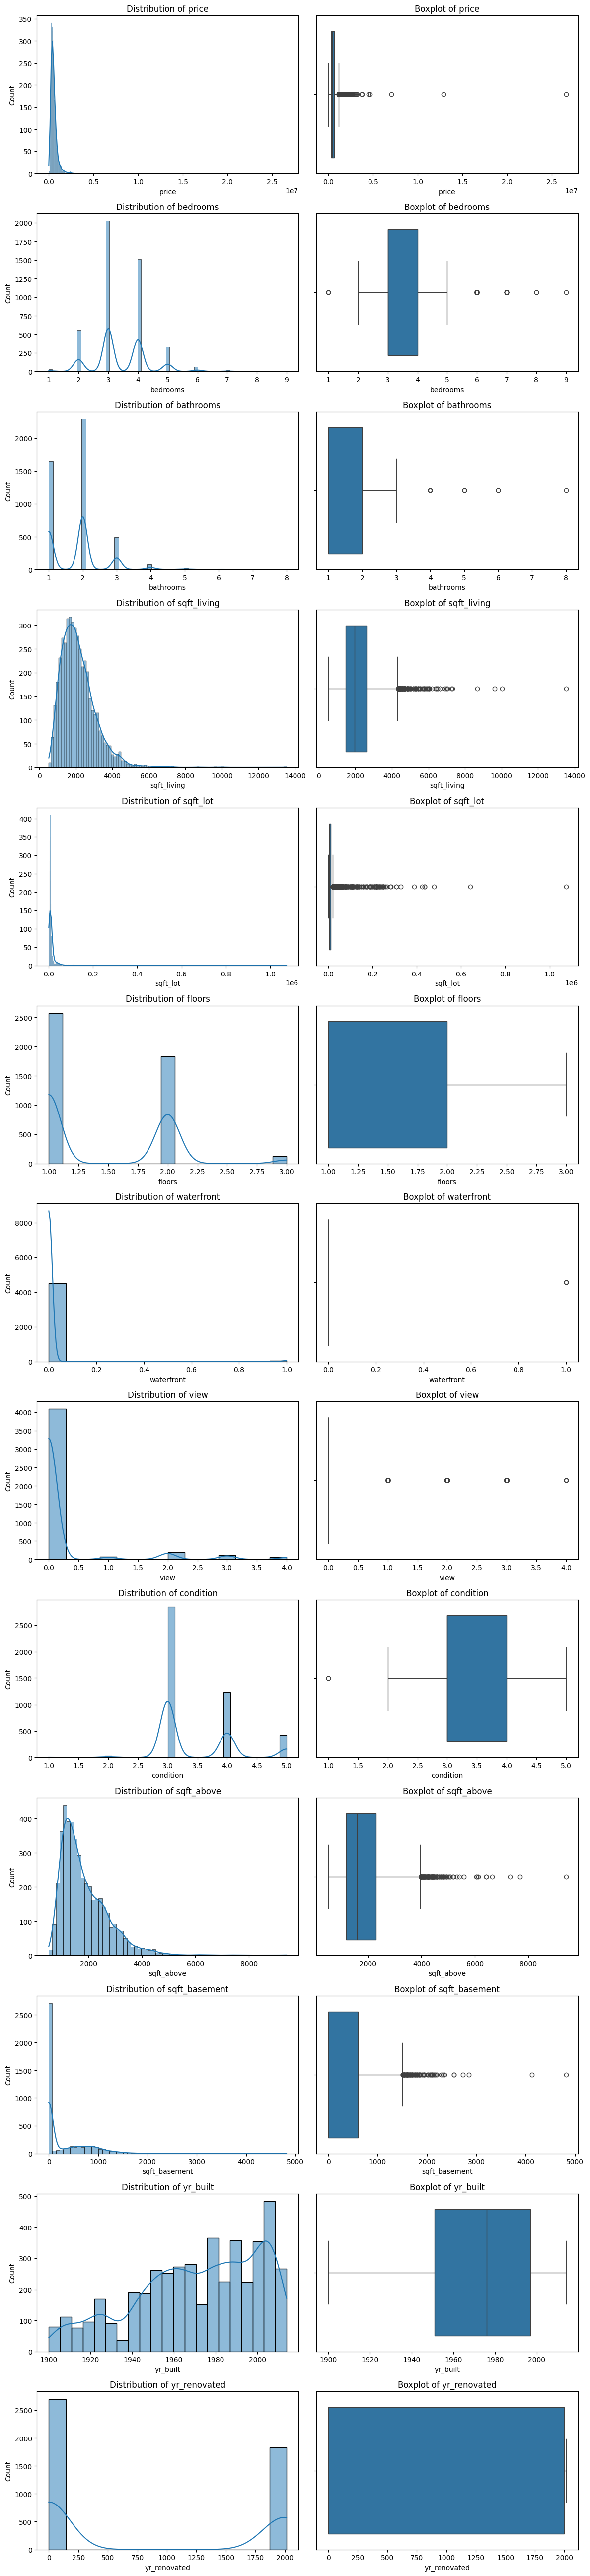

In [129]:
# Calculate rows needed based on the number of columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])
n_cols = len(numerical_data.columns)
n_rows = n_cols

# Adjust figsize dynamically
plt.figure(figsize=(12, 4 * n_rows))

# Loop through each column in the numerical data
for i, col in enumerate(numerical_data.columns):
    # Create a subplot for the distribution plot
    plt.subplot(n_rows, 2, 2 * i + 1)
    # sns.histplot(numerical_data[col], kde=True, bins=30)  # Updated to use sns.histplot
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
     # Create a subplot for the boxplot
    plt.subplot(n_rows, 2, 2 * i + 2)
    sns.boxplot(x=numerical_data[col])
    plt.title(f'Boxplot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4532.0,558614.706085,564648.980755,7800.0,327375.0,465000.0,658691.00,26590000.0
bedrooms,4532.0,3.402471,0.896287,1.0,3.0,3.0,4.00,9.0
bathrooms,4532.0,1.790380,0.736964,1.0,1.0,2.0,2.00,8.0
sqft_living,4532.0,2136.515887,953.354911,520.0,1470.0,1970.0,2610.00,13540.0
sqft_lot,4532.0,14823.323698,36022.760102,638.0,5000.0,7680.0,10922.25,1074218.0
floors,4532.0,1.460282,0.552247,1.0,1.0,1.0,2.00,3.0
waterfront,4532.0,0.006399,0.079746,0.0,0.0,0.0,0.00,1.0
view,4532.0,0.233892,0.763906,0.0,0.0,0.0,0.00,4.0
condition,4532.0,3.449029,0.674475,1.0,3.0,3.0,4.00,5.0
sqft_above,4532.0,1825.248235,852.195176,520.0,1190.0,1590.0,2300.00,9410.0


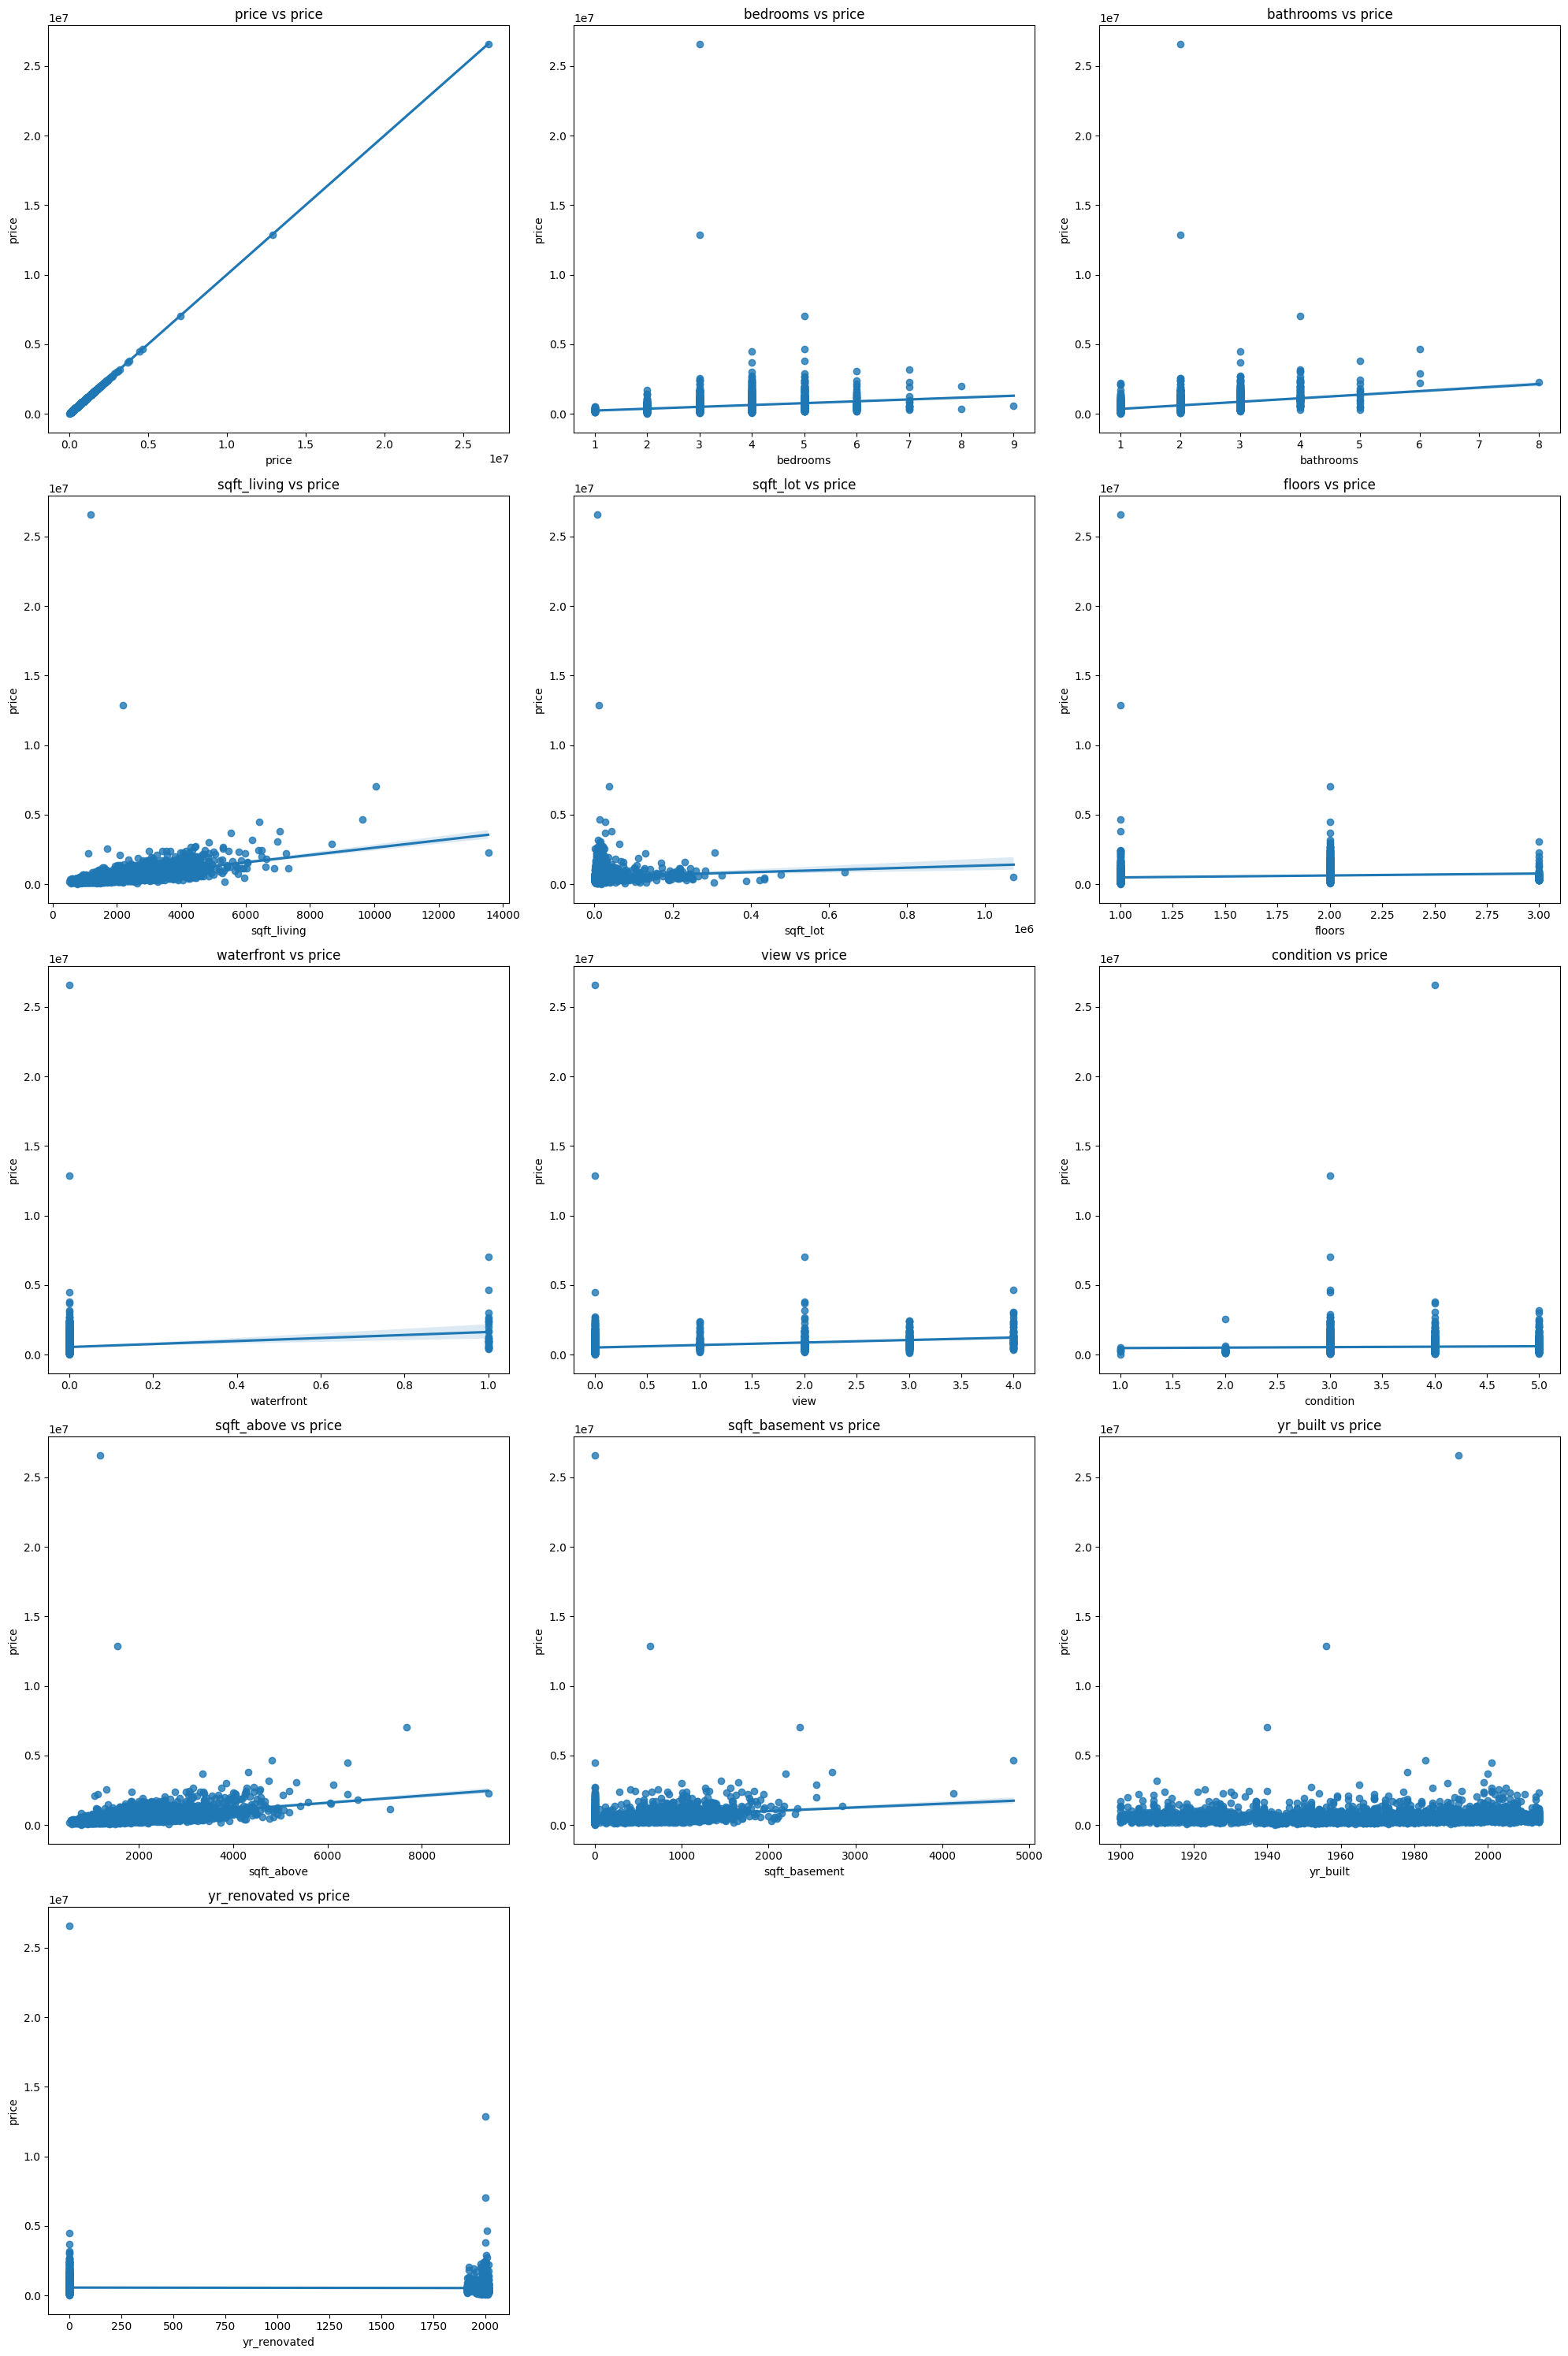

In [133]:
# Define the target column for regression analysis
target_column = "price"

n_plots = len(numeric_features)

cols = 3

rows = -(-n_plots // cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 30))

axes = axes.flatten()
for idx, column in enumerate(numeric_features):
    sns.regplot(data=df, x=column, y=target_column, ax=axes[idx])
    axes[idx].set_title(f'{column} vs {target_column}')

for idx in range(n_plots, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()

plt.show()

In [134]:
df.city.value_counts()

,count
city,
Seattle,1553
Renton,291
Bellevue,281
Redmond,234
Kirkland,187
Issaquah,186
Kent,183
Auburn,175
Sammamish,171


In [135]:
df.groupby("city")[["price"]].sum()

<ipython-input-135-3087737b3c15>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("city")[["price"]].sum()


,price
city,
Algona,1.036440e+06
Auburn,5.268392e+07
Beaux Arts Village,7.450000e+05
Bellevue,2.422937e+08
Black Diamond,3.056450e+06
Bothell,1.588758e+07
Burien,2.543460e+07
Carnation,1.081354e+07
Clyde Hill,1.454140e+07


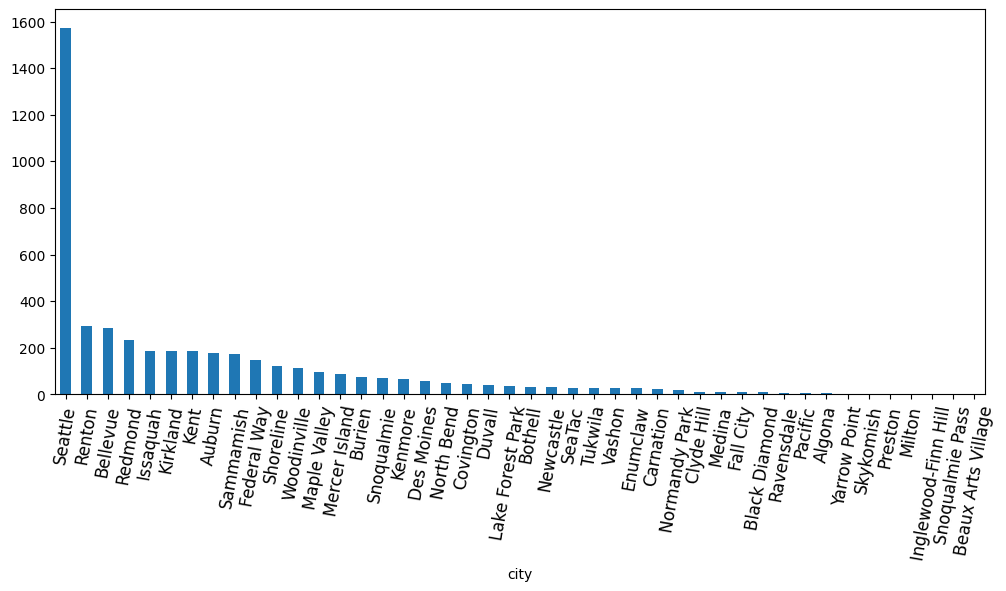

In [136]:
house_df.city.value_counts().plot(kind='bar', figsize=(12,5))
plt.xticks(rotation=80, fontsize=12)
plt.show() # peoples choice for spending most
# seattle may cntain outlier due to its behaviour

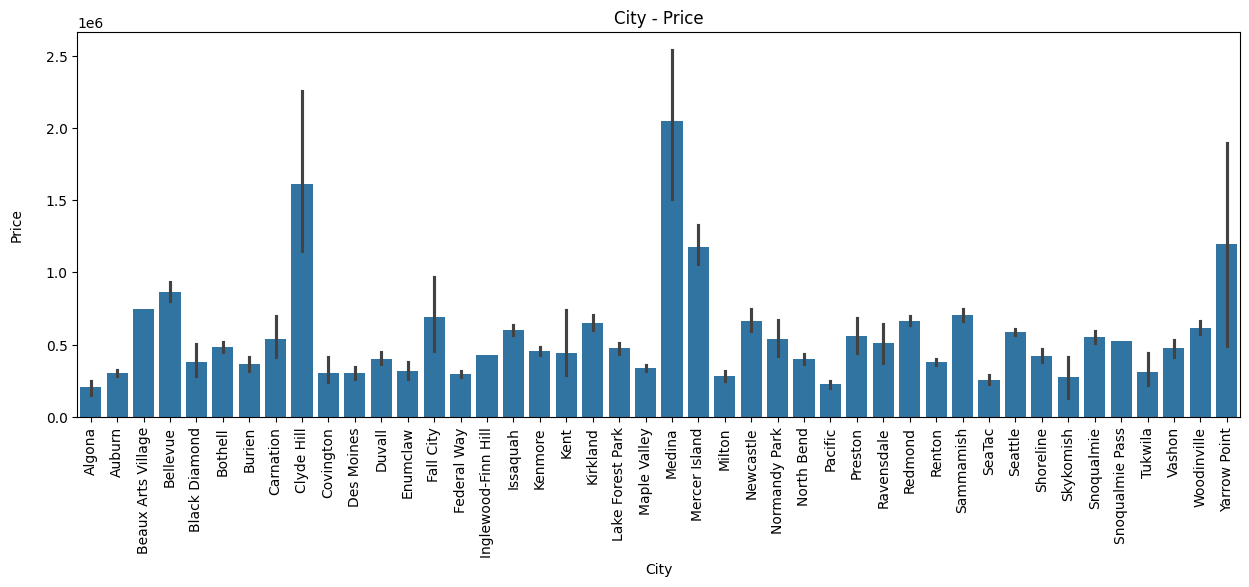

In [139]:
plt.figure(figsize=(15, 5)) # average cost of house in defferent cities
sns.barplot(x = df['city'], y = df.price)
plt.xticks( horizontalalignment="center",rotation = 90 )
plt.xlabel("City")
plt.title("City - Price")
plt.ylabel("Price\n")

plt.show()

<ipython-input-140-9e1673511d8d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_city = df.groupby('city')['price'].mean().sort_values()


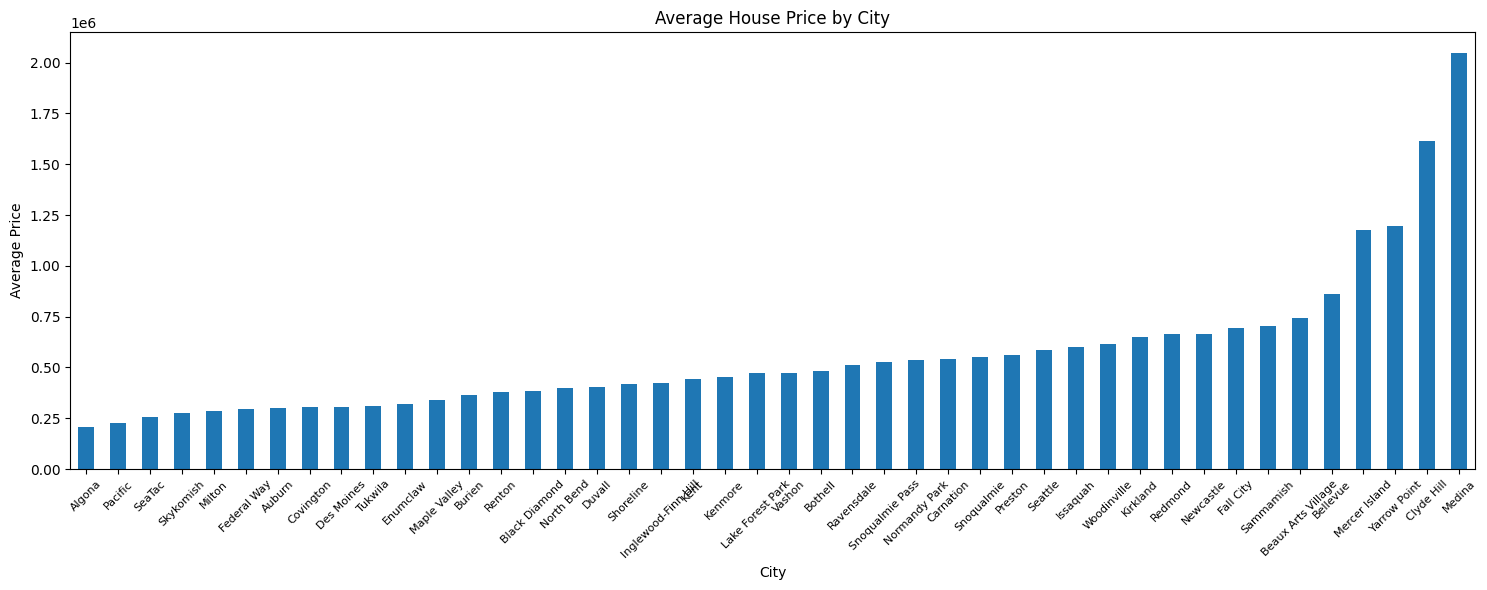

In [140]:
avg_price_by_city = df.groupby('city')['price'].mean().sort_values()
plt.figure(figsize=(15, 6))
avg_price_by_city.plot(kind='bar')
plt.title('Average House Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()

plt.show()

In [142]:
df.street.value_counts()

,count
street,
2520 Mulberry Walk NE,4
2500 Mulberry Walk NE,3
9126 45th Ave SW,2
2803 SW Bataan St,2
8216 Linden Ave N,2
...,...
34434 30th Ave SW,1
806 S 295th Pl,1
17904 Military Rd S,1


In [145]:
df.groupby("street")[["price"]].sum()

,price
street,
1 View Ln NE,309620.0
10 W Etruria St,625000.0
100 20th Ave E,600000.0
100 24th Ave E,460000.0
100 Mt Si Pl NW,575000.0
...,...
Shangri-La Way NW,627000.0
Sunrise Loop Trail,754800.0
Tolt Pipeline Trail,435000.0


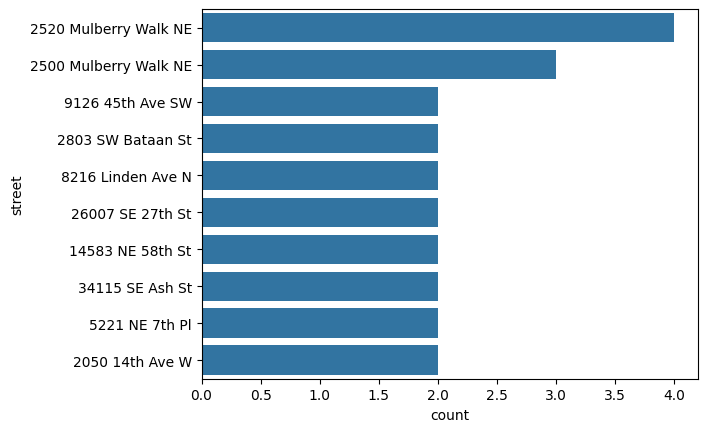

In [146]:
top_10_street = df['street'].value_counts().head(10)
sns.barplot(x = top_10_street, y=top_10_street.index)
plt.show()

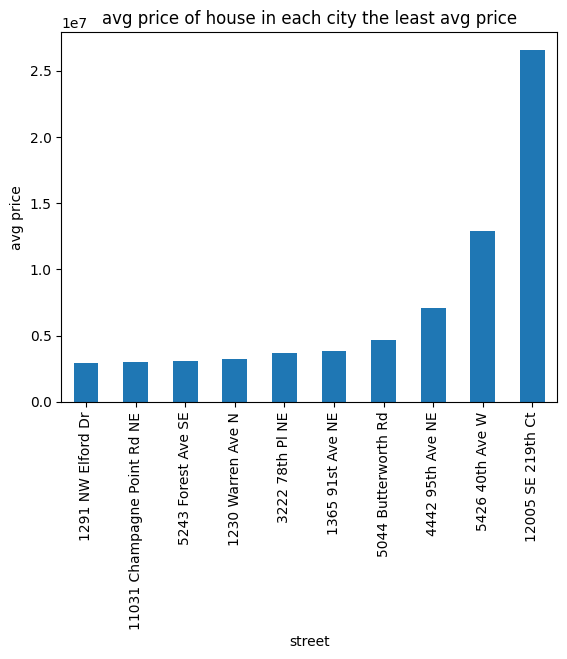

In [191]:
df.groupby('street')['price'].mean().sort_values().tail(10).plot(kind="bar")
plt.xlabel("street")
plt.ylabel("avg price")
plt.title("avg price of house in each city the least avg price");

plt.show()

In [252]:
X=df.loc[:,df.columns[2:-4]]
Y=df["price"]

In [253]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

  #scale
mine_scaler=StandardScaler()
x_train=mine_scaler.fit_transform(x_train)
x_test=mine_scaler.transform(x_test)


In [254]:
lr=LinearRegression()


In [255]:
 lr.fit(x_test,y_test)


LinearRegression()

In [256]:
y_predict=lr.predict(x_test)

In [257]:
y_predict

array([ 500475.98466689, 1139704.4781652 ,  422998.03577059, ...,
        292923.7097497 ,  558339.61252987,  337335.38892876])

In [258]:
linear_regression_acc=r2_score(y_test,y_predict)
print(f'Linear Regression Test accuracy: {linear_regression_acc}')

Linear Regression Test accuracy: 0.6060772806154748


In [259]:
def mine_split(X,Y):

  x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

  mine_scaler=StandardScaler()
  x_train=mine_scaler.fit_transform(x_train)
  x_test=mine_scaler.transform(x_test)

  lr=LinearRegression()
  lr.fit(x_test,y_test)
  y_predict=lr.predict(x_test)
  return y_predict,y_test



In [260]:
X_depend=house_df.loc[:,df.columns[2:-4]]
Y_depend=house_df["price"]
r_y_predict,r_y_test=mine_split(X_depend,Y_depend)
r_y_predict,r_y_test

(array([359234.65103484, 386907.00252448, 609483.57458836, ...,
        949320.77791782, 816305.86805849, 400331.05240934]),
 4111     232000.0
 1996     299950.0
 2307    1085000.0
 3607     229800.0
 1519     499950.0
           ...    
 3750     590000.0
 1599     425000.0
 2672    1200000.0
 3353    1140000.0
 2793     400000.0
 Name: price, Length: 1380, dtype: float64)

In [261]:
linear_regression_acc=r2_score(y_test,y_predict)
print(f'Linear Regression Test accuracy transformed : {linear_regression_acc}')

Linear Regression Test accuracy transformed : 0.6060772806154748


In [262]:
linear_regression_acc=r2_score(r_y_test,r_y_predict)
print(f'Linear Regression Test accuracy original : {linear_regression_acc}')

Linear Regression Test accuracy original : 0.10279059858673767


In [272]:
# pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_predict,'Difference':y_test-y_predict})
# pred_df.round(2)

In [274]:

r222 = r2_score(y_test,y_predict)*100
print("R-squared (R²):", r222)
maaee = mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error (MAE) tansformed:", maaee)


print(" Accuracy of the model transformed is %.2f  " %r222)

R-squared (R²): 60.60772806154748
Mean Absolute Error (MAE) tansformed: 145763.8003432915
 Accuracy of the model transformed is 60.61  


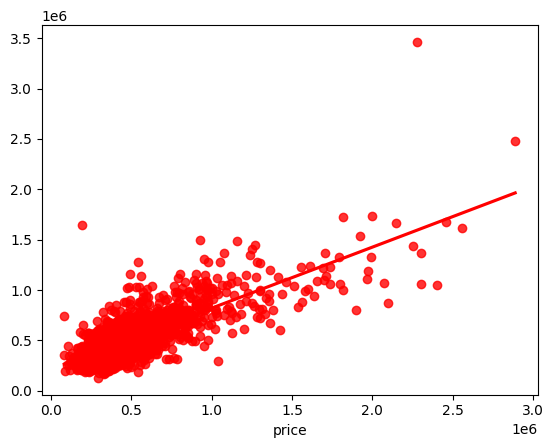

In [275]:
sns.regplot(x=y_test,y=y_predict,ci=None,color ='red'); #transformed

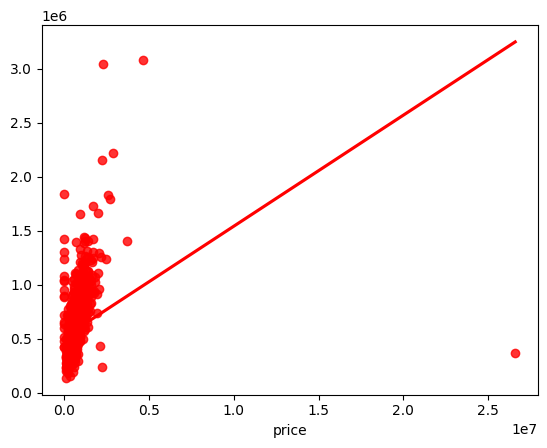

In [276]:
sns.regplot(x=r_y_test,y=r_y_predict,ci=None,color ='red'); # original

# Phase one complete

In [285]:
model = LinearRegression()
cv_scores = cross_val_score(model, X, Y, cv=9, scoring='r2')  # Using R-squared as the scoring metric

print("Cross-validation R-squared scores for each fold: ", cv_scores)
print("Average R-squared score: ", np.mean(cv_scores))

Cross-validation R-squared scores for each fold:  [0.60729252 0.57565677 0.57427448 0.54280002 0.62223855 0.63132568
 0.5437516  0.5977785  0.00068347]
Average R-squared score:  0.521755733314888
